### 1

In [75]:
import numpy as np
import scipy
from skimage import morphology
from scipy import misc, ndimage
import matplotlib.pyplot as plt
from PIL import Image

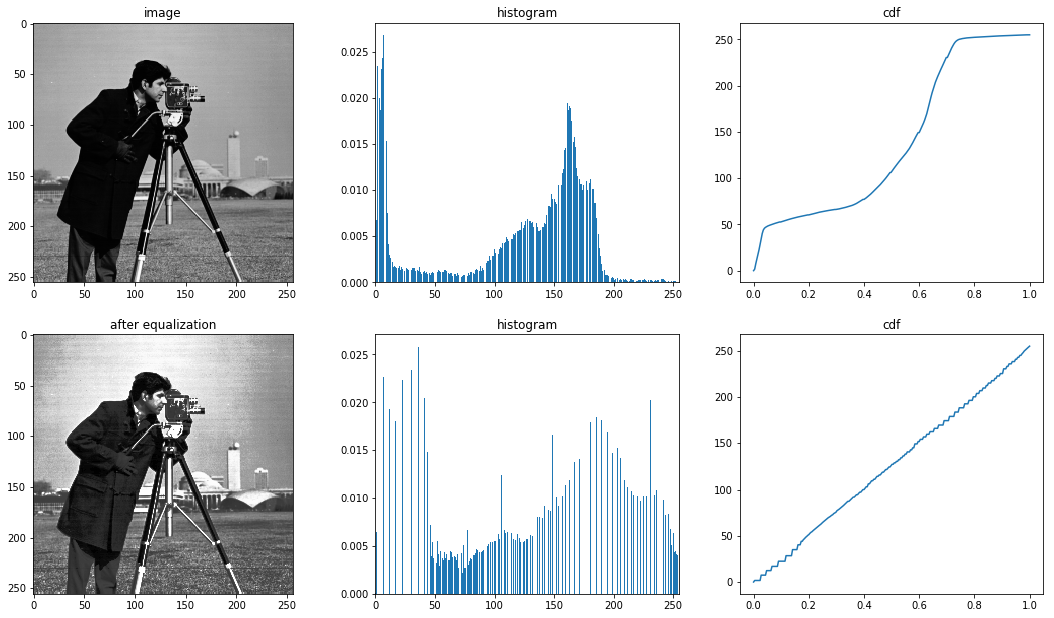

In [11]:
im = np.array(Image.open('../data/cameraman.tiff').convert('L'))

f, ax = plt.subplots(2, 3)
plt.gray()
f.set_size_inches(18.5, 10.5)


ax[0, 0].imshow(im)
ax[0, 0].set_title('image')

# image histogram
imhist, bins = np.histogram(im.flatten(), 256, normed=True)
ax[0, 1].bar(range(256), imhist)
ax[0, 1].set_xlim([0, 255])
ax[0, 1].set_title('histogram')

# cumulative distribution function
cdf = imhist.cumsum()
cdf = 255 * cdf / cdf[-1] # normilize
ax[0, 2].plot(np.linspace(0, 1, 256), cdf)
ax[0, 2].set_title('cdf')

# linear interpolation of cdf to find new pixel values
im2 = np.interp(im.flatten(), bins[:-1], cdf)
ax[1, 0].imshow(im2.reshape(im.shape))
ax[1, 0].set_title('after equalization')

# image histogram
imhist, bins = np.histogram(im2.flatten(), 256, normed=True)
ax[1, 1].bar(range(256), imhist)
ax[1, 1].set_xlim([0, 255])
ax[1, 1].set_title('histogram')

# cumulative distribution function
cdf = imhist.cumsum()
cdf = 255 * cdf / cdf[-1] # normilize
ax[1, 2].plot(np.linspace(0, 1, 256), cdf)
ax[1, 2].set_title('cdf')

plt.show()

### 2

In [ ]:
#1
# in Cy - the values outside the diagonal are 0. and the values within the diagonal are its own values.
# but they're the values of Cx, poduced by a product in matrix A.

In [ ]:
#2
#3.6
# All that histogram equalization does is remap histogram components on the in- tensity scale.
# To obtain a uniform (flat) histogram would require in general that pixel intensities actually be
# redistributed so that there are L groups of n /L pixels with the same intensity,
# where L is the number of allowed discrete intensity lev- els and n = M N is the total number of pixels
# in the input image.
# The histogram equalization method has no provisions for this type
# of (artificial) intensity redis- tribution process.

In [ ]:
#3.16
# a. The key to solving this problem is to recognize (1) that the convolution re- sult at any location (x , y)
# consists of centering the mask at that point and then forming the sum of the products of the mask coefficients
# with the corresponding pixels in the image;
# and (2) that convolution of the mask with the entire image results in every pixel in the image being
# visited only once by every element of the mask
# (i.e., every pixel is multiplied once by every coefficient of the mask).
# Because the coefficients of the mask sum to zero, this means that the sum of the products of the coefficients
# with the same pixel also sum to zero.
# Carrying out this argument for every pixel in the image leads to the conclusion that the sum of the elements
# of the convolution array also sum to zero.

# b. The only difference between convolution and correlation is that the mask is rotated by 180◦.
# This does not affect the conclusions reached in (a), so cor- relating an image with a mask whose coefficients
# sum to zero will produce a correlation image whose elements also sum to zero.

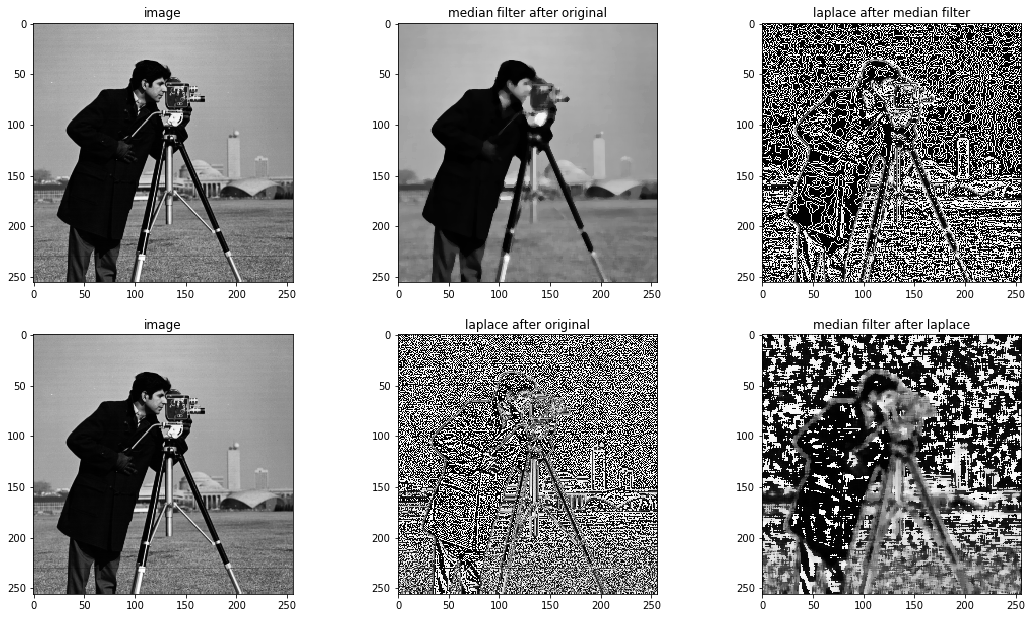

In [19]:
#3
#3.23

f, ax = plt.subplots(2, 3)
plt.gray()
f.set_size_inches(18.5, 10.5)

# original image
ax[0, 0].imshow(im)
ax[0, 0].set_title('image')

# median filter after original
filtered_im = ndimage.median_filter(im, size=5)
ax[0, 1].imshow(filtered_im)
ax[0, 1].set_title('median filter after original')

# laplace after median filter
laplace_im = ndimage.laplace(filtered_im)
ax[0, 2].imshow(laplace_im)
ax[0, 2].set_title('laplace after median filter')

# original image
ax[1, 0].imshow(im)
ax[1, 0].set_title('image')

# laplace after original
laplace_im2 = ndimage.laplace(im)
ax[1, 1].imshow(laplace_im2)
ax[1, 1].set_title('laplace after original')

# median filter after laplace
filtered_im2 = ndimage.median_filter(laplace_im2, size=5)
ax[1, 2].imshow(filtered_im2)
ax[1, 2].set_title('median filter after laplace')

plt.show()

### 3

In [23]:
# 9.2 a)

a = np.zeros((7, 7), dtype=np.int)
a[1, 1] = 1
a[2:4, 2:4] = 1
a[4:6, 4:6] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [25]:
s = np.array([[1, 0, 0],
              [0, 1, 1],
              [0, 1, 1]])
a_hm = ndimage.binary_hit_or_miss(a, structure1=s).astype(np.int)
a_hm

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [26]:
# b)
# Only one pass is required. Application of the hit-or-miss transform using a given structure
# finds all instances of occurrence of the pattern described by that structuring element.

In [70]:
# c) The order does matter.

s1 = np.array([[0, 1, 0],
               [1, 1, 0],
               [0, 0, 0]])
s2 = np.array([[0, 1, 0],
               [0, 1, 1],
               [0, 0, 0]])
s3 = np.array([[0, 0, 0],
               [0, 1, 1],
               [0, 1, 0]])
s4 = np.array([[0, 0, 0],
               [1, 1, 0],
               [0, 1, 0]])

In [71]:
b = np.zeros((4, 10), dtype=np.int)
b[1, 5:10] = 1
b[2, 0:6] = 1
# b[4:6, 4:6] = 1
b

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [72]:
b_hm_s1 = ndimage.binary_hit_or_miss(b, structure1=s1).astype(np.int)
b_hm_s2 = ndimage.binary_hit_or_miss(b, structure1=s2).astype(np.int)
b_hm_s3 = ndimage.binary_hit_or_miss(b, structure1=s3).astype(np.int)
b_hm_s4 = ndimage.binary_hit_or_miss(b, structure1=s4).astype(np.int)
print(b_hm_s1, b_hm_s2, b_hm_s3, b_hm_s4)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


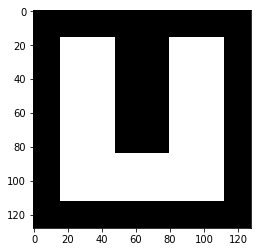

In [81]:
# 9.5)
scale = 16 # resolution of shape

# draw original image
shape = np.zeros((8*scale, 8*scale), dtype=np.int)
shape[1*scale:7*scale, 1*scale:3*scale] = 1
shape[1*scale:7*scale, 5*scale:7*scale] = 1
shape[int(5.3*scale):7*scale, 1*scale:7*scale] = 1
plt.imshow(shape)

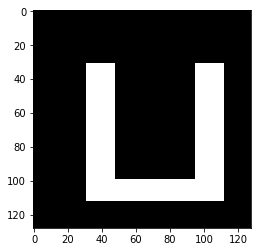

In [86]:
edore_a_struct = morphology.square(scale)
edore_a_origin = (scale // 2 - 1, scale // 2 -1)
edore_a = ndimage.binary_erosion(shape, structure=edore_a_struct, origin=edore_a_origin)
plt.imshow(edore_a, cmap='binary_r')

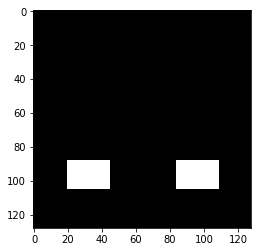

In [89]:
edore_b = ndimage.binary_erosion(shape,
                                 structure=morphology.rectangle(int(5*scale),int(.5*scale)),
                                 origin=(int(2*scale), 0))
plt.imshow(edore_b)

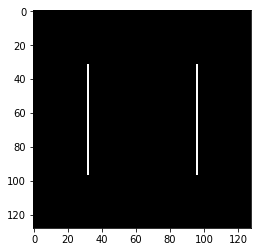

In [90]:
edore_c_struct = morphology.rectangle(scale*2, scale*2)
edore_c = ndimage.binary_erosion(shape, structure=edore_c_struct)
dilate_c_struct = morphology.disk(scale//2)
shape_c = ndimage.binary_dilation(edore_c, structure=dilate_c_struct)
plt.imshow(edore_c, cmap='binary_r')

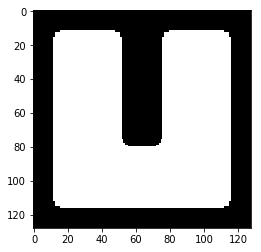

In [91]:
dilate_d_struct = ndimage.binary_dilation(shape, structure=morphology.disk(scale//2))
edore_d_struct = ndimage.binary_erosion(dilate_d_struct, structure=morphology.disk(scale//4))
plt.imshow(edore_d_struct)